<a href="https://colab.research.google.com/github/kristinkx/KristinKX/blob/main/Philadelphia%20Crime%20(Machine%20Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandasql
import pandasql as ps

import matplotlib
import matplotlib.pyplot as plt
# plt.style.use('dark_background')
plt.style.use('fivethirtyeight')

from pandas.plotting import scatter_matrix

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 7)  # adjusts the configuration of the plots we will create

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
import statsmodels.formula.api as smf
import statsmodels.api as sm
import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest

import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
import numpy as np
from datetime import datetime

import folium


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas as pd
  
od.download(
    "https://www.kaggle.com/datasets/mchirico/philadelphiacrimedata")

Skipping, found downloaded files in "./philadelphiacrimedata" (use force=True to force download)


In [ ]:
philly = pd.read_csv('philadelphiacrimedata/crime.csv')
philly.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532


In [ ]:
print("data info \n************")
print(philly.info())
print("***********")
print('data shape \n************')
print(philly.shape)
print("***********")
philly.describe()

data info 
**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237605 entries, 0 to 2237604
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Dc_Dist             int64  
 1   Psa                 object 
 2   Dispatch_Date_Time  object 
 3   Dispatch_Date       object 
 4   Dispatch_Time       object 
 5   Hour                int64  
 6   Dc_Key              int64  
 7   Location_Block      object 
 8   UCR_General         float64
 9   Text_General_Code   object 
 10  Police_Districts    float64
 11  Month               object 
 12  Lon                 float64
 13  Lat                 float64
dtypes: float64(4), int64(3), object(7)
memory usage: 239.0+ MB
None
***********
data shape 
************
(2237605, 14)
***********


,Dc_Dist,Hour,Dc_Key,UCR_General,Police_Districts,Lon,Lat
count,2.237605e+06,2.237605e+06,2.237605e+06,2.236942e+06,2.217675e+06,2.220256e+06,2.220256e+06
mean,1.726837e+01,1.315990e+01,2.010975e+11,1.271354e+03,1.206404e+01,-7.514992e+01,3.999201e+01
std,1.064898e+01,6.799952e+00,3.234684e+08,8.143510e+02,5.792056e+00,5.973890e-02,4.534823e-02
min,1.000000e+00,0.000000e+00,1.998121e+11,1.000000e+02,1.000000e+00,-7.527773e+01,3.986999e+01
25%,9.000000e+00,9.000000e+00,2.008151e+11,6.000000e+02,8.000000e+00,-7.518490e+01,3.995571e+01
50%,1.600000e+01,1.400000e+01,2.011060e+11,8.000000e+02,1.200000e+01,-7.515668e+01,3.999105e+01
75%,2.400000e+01,1.900000e+01,2.014021e+11,1.800000e+03,1.700000e+01,-7.511844e+01,4.002739e+01
max,9.200000e+01,2.300000e+01,2.017770e+11,2.600000e+03,2.200000e+01,-7.495750e+01,4.013790e+01


In [ ]:
philly.isnull().sum()

Dc_Dist                   0
Psa                       0
Dispatch_Date_Time        0
Dispatch_Date             0
Dispatch_Time             0
Hour                      0
Dc_Key                    0
Location_Block            0
UCR_General             663
Text_General_Code       663
Police_Districts      19930
Month                     0
Lon                   17349
Lat                   17349
dtype: int64

In [ ]:
philly.dropna(how = 'any', inplace  = True)
philly.isnull().sum()

Dc_Dist               0
Psa                   0
Dispatch_Date_Time    0
Dispatch_Date         0
Dispatch_Time         0
Hour                  0
Dc_Key                0
Location_Block        0
UCR_General           0
Text_General_Code     0
Police_Districts      0
Month                 0
Lon                   0
Lat                   0
dtype: int64

In [ ]:
philly['Text_General_Code'].unique().tolist()

['Weapon Violations',
 'All Other Offenses',
 'Thefts',
 'Other Assaults',
 'Disorderly Conduct',
 'Arson',
 'Fraud',
 'Theft from Vehicle',
 'Robbery No Firearm',
 'Robbery Firearm',
 'Motor Vehicle Theft',
 'Rape',
 'Burglary Residential',
 'Vagrancy/Loitering',
 'Embezzlement',
 'Homicide - Criminal',
 'Narcotic / Drug Law Violations',
 'Vandalism/Criminal Mischief',
 'Gambling Violations',
 'Aggravated Assault No Firearm',
 'Aggravated Assault Firearm',
 'Other Sex Offenses (Not Commercialized)',
 'Prostitution and Commercialized Vice',
 'Forgery and Counterfeiting',
 'Burglary Non-Residential',
 'DRIVING UNDER THE INFLUENCE',
 'Public Drunkenness',
 'Liquor Law Violations',
 'Receiving Stolen Property',
 'Recovered Stolen Motor Vehicle',
 'Homicide - Gross Negligence',
 'Offenses Against Family and Children',
 'Homicide - Justifiable']

In [ ]:
philly['Text_General_Code'] = philly['Text_General_Code'].replace({'Homicide - Criminal': 'Homicide_Criminal', 
                                     'Aggravated Assault Firearm': 'Aggravated_Assault_Firearm', 
                                     'Robbery Firearm': 'Robbery_Firearm',
                                     'Homicide - Gross Negligence' : 'Homicide_Gross_Negligence',
                                    'All Other Offenses' : 'All_Other_Offenses',
                                    'Homicide - Gross Negligence': 'Homicide_Gross_Negligence',
                                    'Weapon Violations' : "Weapon_Violations",
                                    'Lon': 'Longitude',
                                    'Lat': 'Latitude'})
philly.Text_General_Code.unique().tolist()

['Weapon_Violations',
 'All_Other_Offenses',
 'Thefts',
 'Other Assaults',
 'Disorderly Conduct',
 'Arson',
 'Fraud',
 'Theft from Vehicle',
 'Robbery No Firearm',
 'Robbery_Firearm',
 'Motor Vehicle Theft',
 'Rape',
 'Burglary Residential',
 'Vagrancy/Loitering',
 'Embezzlement',
 'Homicide_Criminal',
 'Narcotic / Drug Law Violations',
 'Vandalism/Criminal Mischief',
 'Gambling Violations',
 'Aggravated Assault No Firearm',
 'Aggravated_Assault_Firearm',
 'Other Sex Offenses (Not Commercialized)',
 'Prostitution and Commercialized Vice',
 'Forgery and Counterfeiting',
 'Burglary Non-Residential',
 'DRIVING UNDER THE INFLUENCE',
 'Public Drunkenness',
 'Liquor Law Violations',
 'Receiving Stolen Property',
 'Recovered Stolen Motor Vehicle',
 'Homicide_Gross_Negligence',
 'Offenses Against Family and Children',
 'Homicide - Justifiable']

Text(0.5, 1.0, 'Major Crime Reported')

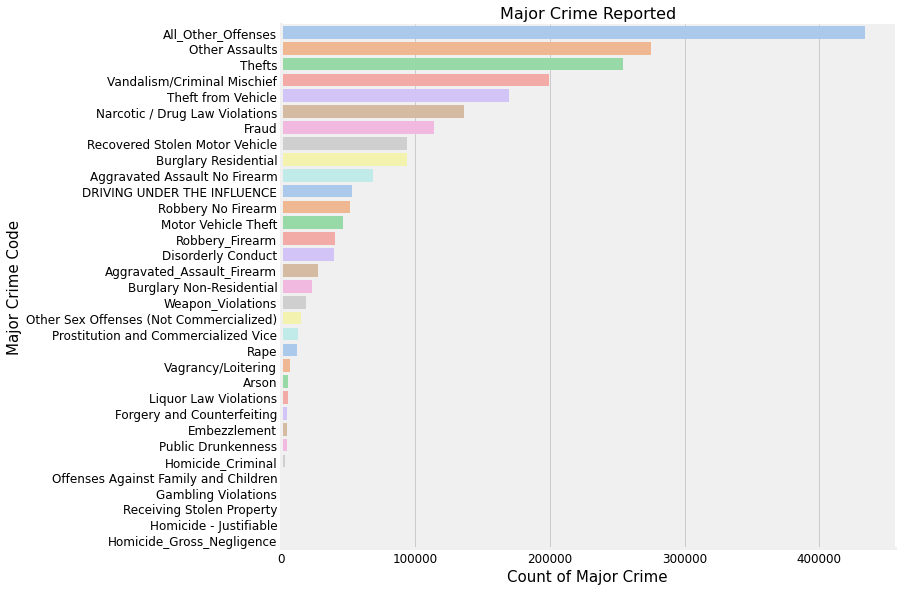

In [ ]:
sns.catplot(y='Text_General_Code',
           kind ='count',
           height = 8,
           aspect =1.5, 
           palette=("pastel"),
           order=philly.Text_General_Code.value_counts().index,
           data=philly)

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Count of Major Crime", fontsize = 15)
plt.ylabel("Major Crime Code", fontsize=15)
plt.title("Major Crime Reported", fontsize=16)

In [ ]:
major_crime_query = '''

SELECT * 
FROM philly

WHERE "Text_General_Code" == "Robbery_Firearm"
OR "Text_General_Code" == "Homicide_Criminal"
OR "Text_General_Code" == "Weapon_Violations"
OR "Text_General_Code" == "Aggravated_Assault_Firearm"
OR "Text_General_Code" == "Arson"

'''
major_crime = ps.sqldf(major_crime_query, globals())
# major_crime.tail()

In [ ]:
# sns.lmplot(x='Lon', y='Lat',  hue ='Text_General_Code', 
#            data = major_crime, 
#            fit_reg = False, scatter_kws={'alpha':0.6});

In [ ]:
major_crime['year'] = pd.DatetimeIndex(major_crime['Dispatch_Date_Time']).year
major_crime['calendar_month'] = pd.DatetimeIndex(major_crime['Dispatch_Date_Time']).month
major_crime.columns

Index(['Dc_Dist', 'Psa', 'Dispatch_Date_Time', 'Dispatch_Date',
       'Dispatch_Time', 'Hour', 'Dc_Key', 'Location_Block', 'UCR_General',
       'Text_General_Code', 'Police_Districts', 'Month', 'Lon', 'Lat', 'year',
       'calendar_month'],
      dtype='object')

In [ ]:
major_crime = major_crime.astype({"Police_Districts" : 'int64'})
print(major_crime.info())
print(major_crime.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95609 entries, 0 to 95608
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Dc_Dist             95609 non-null  int64  
 1   Psa                 95609 non-null  object 
 2   Dispatch_Date_Time  95609 non-null  object 
 3   Dispatch_Date       95609 non-null  object 
 4   Dispatch_Time       95609 non-null  object 
 5   Hour                95609 non-null  int64  
 6   Dc_Key              95609 non-null  int64  
 7   Location_Block      95609 non-null  object 
 8   UCR_General         95609 non-null  float64
 9   Text_General_Code   95609 non-null  object 
 10  Police_Districts    95609 non-null  int64  
 11  Month               95609 non-null  object 
 12  Lon                 95609 non-null  float64
 13  Lat                 95609 non-null  float64
 14  year                95609 non-null  int64  
 15  calendar_month      95609 non-null  int64  
dtypes: f

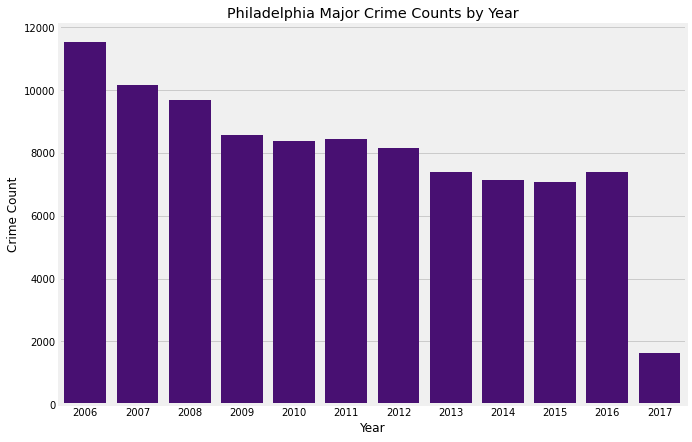

In [ ]:
year_list = major_crime.year.tolist()

dist_bins = np.array(year_list)
sns.countplot(major_crime['year'], color='indigo')
plt.title("Philadelphia Major Crime Counts by Year")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.show()

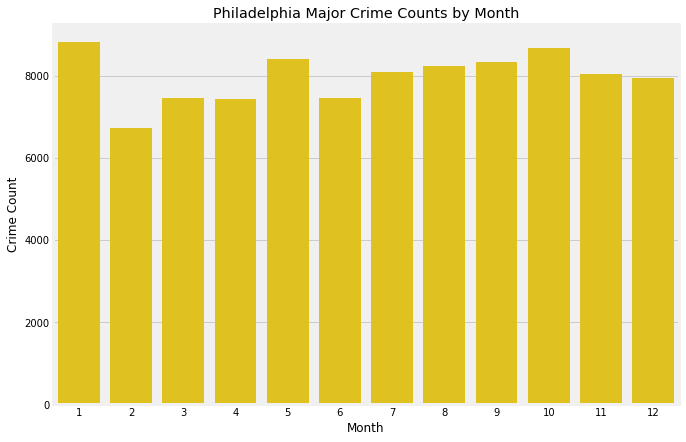

In [ ]:
month_list = major_crime.calendar_month.tolist()

dist_bins = np.array(month_list)
sns.countplot(major_crime['calendar_month'], color='gold')
plt.title("Philadelphia Major Crime Counts by Month")
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.show()

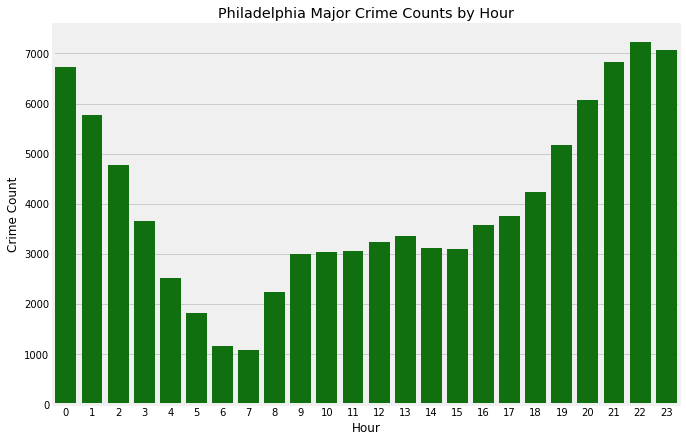

In [ ]:
hour_list = major_crime.Hour.tolist()

dist_bins = np.array(hour_list)
sns.countplot(major_crime['Hour'], color='green')
plt.title("Philadelphia Major Crime Counts by Hour")
plt.xlabel("Hour")
plt.ylabel("Crime Count")
plt.show()

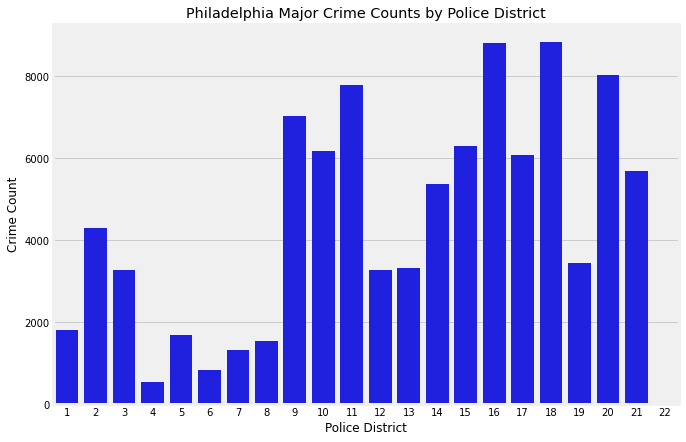

In [138]:
police_list = major_crime.Police_Districts.tolist()
# print(major_crime.Police_Districts.unique().tolist())

dist_bins = np.array(police_list)
sns.countplot(major_crime['Police_Districts'], color='blue')
plt.title("Philadelphia Major Crime Counts by Police District")
plt.xlabel("Police District")
plt.ylabel("Crime Count")
plt.show()

In [ ]:
def select_marker_color(row):
    if row['Text_General_Code'] == 'Aggravated_Assault_Firearm':
        return 'red'
    elif row['Text_General_Code'] == 'Homicide_Criminal':
        return 'black'
    elif row['Text_General_Code'] == 'Weapon_Violations':
        return 'green'
    elif row['Text_General_Code'] == 'Robbery_Firearm':
        return 'green'
    else: 
        return 'blue'

major_crime['colors'] = major_crime.apply(select_marker_color, axis = 1 )
major_crime.head(10)

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,year,calendar_month,colors
0,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon_Violations,20,2009-07,-75.130477,40.036389,2009,7,green
1,19,A,2009-05-21 09:46:00,2009-05-21,09:46:00,9,200919045006,7500 BLOCK WOODBINE AVE,900.0,Arson,15,2009-05,-75.266605,39.975197,2009,5,blue
2,14,H,2009-04-15 14:09:00,2009-04-15,14:09:00,14,200914026604,0 BLOCK E HIGH ST,900.0,Arson,10,2009-04,-75.176900,40.040153,2009,4,blue
3,22,2,2015-11-05 11:44:00,2015-11-05,11:44:00,11,201522099656,N 22ND ST / DIAMOND ST,300.0,Robbery_Firearm,16,2015-11,-75.169577,39.986415,2015,11,green
4,19,2,2010-11-19 06:00:00,2010-11-19,06:00:00,6,201019108219,100 BLOCK N 60TH ST,300.0,Robbery_Firearm,15,2010-11,-75.240363,39.964133,2010,11,green
5,19,1,2015-10-30 03:14:00,2015-10-30,03:14:00,3,201519110436,6100 BLOCK LANCASTER AVE,900.0,Arson,15,2015-10,-75.243280,39.983441,2015,10,blue
6,24,1,2015-08-03 02:00:00,2015-08-03,02:00:00,2,201524072876,3400 BLOCK I ST,900.0,Arson,17,2015-08,-75.110615,39.999322,2015,8,blue
7,17,3,2011-01-25 21:51:00,2011-01-25,21:51:00,21,201117003758,20TH TASKER ST,300.0,Robbery_Firearm,3,2011-01,-75.143739,39.927197,2011,1,green
8,25,4,2015-10-16 00:58:00,2015-10-16,00:58:00,0,201525085350,2900 BLOCK N 05TH ST,1500.0,Weapon_Violations,18,2015-10,-75.139346,39.996257,2015,10,green
9,35,1,2011-07-09 01:19:00,2011-07-09,01:19:00,1,201135050585,300 BLOCK E NEDRO AVE,300.0,Robbery_Firearm,20,2011-07,-75.117206,40.039539,2011,7,green


In [126]:
major_2016_query = '''

SELECT *
FROM major_crime
WHERE year = 2016 AND calendar_month = 5

'''

major_2016 = ps.sqldf(major_2016_query, globals())
major_2016.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,year,calendar_month,colors
0,25,1,2016-05-16 13:32:00,2016-05-16,13:32:00,13,201625040458,4200 BLOCK N 09TH ST,400.0,Aggravated_Assault_Firearm,18,2016-05,-75.140810,40.016979,2016,5,red
1,25,1,2016-05-16 18:29:00,2016-05-16,18:29:00,18,201625040542,700 BLOCK W LUZERNE ST,400.0,Aggravated_Assault_Firearm,18,2016-05,-75.139516,40.012424,2016,5,red
2,15,2,2016-05-17 00:13:00,2016-05-17,00:13:00,0,201615047043,1500 BLOCK COMLY ST,300.0,Robbery_Firearm,11,2016-05,-75.077441,40.031794,2016,5,green
3,2,1,2016-05-17 02:44:00,2016-05-17,02:44:00,2,201602029274,1200 BLOCK E CHELTENHAM AVE,300.0,Robbery_Firearm,2,2016-05,-75.086492,40.032971,2016,5,green
4,22,1,2016-05-16 21:25:00,2016-05-16,21:25:00,21,201622040936,1500 BLOCK W OAKDALE ST,400.0,Aggravated_Assault_Firearm,16,2016-05,-75.157372,39.993802,2016,5,red


In [137]:
major_2016_map = folium.Map(
    location = [39.997203,75.115305], zoom_start = 2
)

for _, scene in major_2016.iterrows():
    folium.Marker(
    location = [scene['Lat'], scene['Lon']],
        popup = scene['Police_Districts'], 
        icon = folium.Icon(color = scene['colors'])
    ).add_to(major_2016_map)
    
major_2016_map

In [ ]:
# month_list = major_crime.Month.tolist()

# dist_bins = np.array(month_list)
# sns.countplot(major_crime['Month'], color='indigo')
# plt.title("Philadelphia Major Crime Counts by Month")
# plt.xlabel("Month")
# plt.ylabel("Major Crime Count")
# plt.show()